origin：https://github.com/yjfiejd/k-means_2/blob/master/Kmeans%26Dbscan.py

# 1)调用sklearn调用,导入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f=open('files/data/python81/data.txt','r',encoding='utf-8')

In [3]:
beer = pd.read_csv(f, sep=' ')
print(beer)
print("***********************************")

                    name  calories  sodium  alcohol  cost
0              Budweiser       144      15      4.7  0.43
1                Schlitz       151      19      4.9  0.43
2              Lowenbrau       157      15      0.9  0.48
3            Kronenbourg       170       7      5.2  0.73
4               Heineken       152      11      5.0  0.77
5          Old_Milwaukee       145      23      4.6  0.28
6             Augsberger       175      24      5.5  0.40
7   Srohs_Bohemian_Style       149      27      4.7  0.42
8            Miller_Lite        99      10      4.3  0.43
9        Budweiser_Light       113       8      3.7  0.40
10                 Coors       140      18      4.6  0.44
11           Coors_Light       102      15      4.1  0.46
12        Michelob_Light       135      11      4.2  0.50
13                 Becks       150      19      4.7  0.76
14                 Kirin       149       6      5.0  0.79
15     Pabst_Extra_Light        68      15      2.3  0.38
16            

In [4]:
X = beer[["calories", "sodium", "alcohol", "cost"]]

# 2 K-means训练

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)
print("This is km.labels_:",km.labels_) #告诉你第几个数据属于哪个类别，这里共3种类别0、1、2
print("This is km2.labels_:", km2.labels_)
print("***********************************")

This is km.labels_: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 2 0 0 2 1]
This is km2.labels_: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1]
***********************************


In [6]:
#新建两列在pandas中，把第一轮分类结果，扩展在pandas表中
beer['cluster1'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster1')
beer.sort_values('cluster2')
print(beer)
print("***********************************")

                    name  calories  sodium  alcohol  cost  cluster1  cluster2
0              Budweiser       144      15      4.7  0.43         0         0
1                Schlitz       151      19      4.9  0.43         0         0
2              Lowenbrau       157      15      0.9  0.48         0         0
3            Kronenbourg       170       7      5.2  0.73         0         0
4               Heineken       152      11      5.0  0.77         0         0
5          Old_Milwaukee       145      23      4.6  0.28         0         0
6             Augsberger       175      24      5.5  0.40         0         0
7   Srohs_Bohemian_Style       149      27      4.7  0.42         0         0
8            Miller_Lite        99      10      4.3  0.43         1         1
9        Budweiser_Light       113       8      3.7  0.40         1         1
10                 Coors       140      18      4.6  0.44         0         0
11           Coors_Light       102      15      4.1  0.46       

# 3）看三堆中到平均值，找下一波质心到位置

In [7]:
from pandas.tools.plotting import scatter_matrix
cluster_centers_1 = km.cluster_centers_
cluster_centers_2 = km2.cluster_centers_
print(beer.groupby("cluster1").mean())
print(beer.groupby("cluster2").mean())
print("***********************************")

          calories  sodium   alcohol      cost  cluster2
cluster1                                                
0           150.00    17.0  4.521429  0.520714         0
1           102.75    10.0  4.075000  0.440000         1
2            70.00    10.5  2.600000  0.420000         1
            calories     sodium   alcohol      cost  cluster1
cluster2                                                     
0         150.000000  17.000000  4.521429  0.520714  0.000000
1          91.833333  10.166667  3.583333  0.433333  1.333333
***********************************


# 4）把中心点拿出来，准备画图

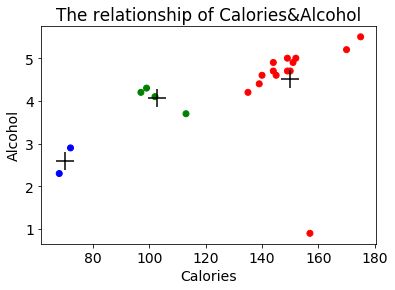

In [8]:
centers = beer.groupby("cluster1").mean().reset_index()
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue'])
#这里先挑选两2中数据，进行画图
#先绘制数据点,让颜色（红，绿，蓝）与cluster1中的（0类，1类，2类）对应起来
plt.scatter(beer["calories"], beer["alcohol"], c=colors[beer["cluster1"]])
#再绘制数据点中的中心点位置
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel("Calories")
plt.ylabel("Alcohol")
plt.title("The relationship of Calories&Alcohol")
plt.show()

# 5）但是我们数据分别有4个维度，我们希望看俩俩之间的关系

G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


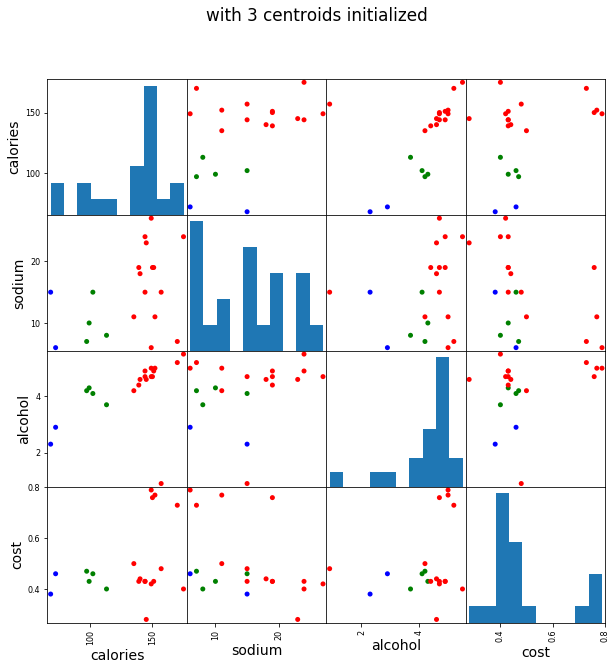

In [9]:
# 先看簇1
scatter_matrix(beer[["calories", "sodium", "alcohol", "cost"]], s=100, alpha=1, c=colors[beer["cluster1"]], figsize=(10, 10))
plt.suptitle("with 3 centroids initialized")
plt.show()

G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


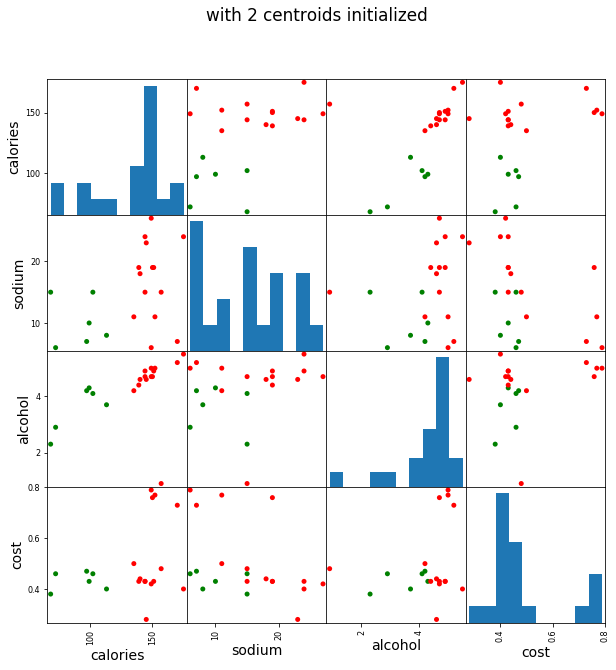

***********************************


In [10]:
# 再看簇2
scatter_matrix(beer[["calories", "sodium", "alcohol", "cost"]], s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10, 10))
plt.suptitle("with 2 centroids initialized")
plt.show()
print("***********************************")

[[ 0.38791334  0.00779468  0.43380786 -0.45682969]
 [ 0.6250656   0.63136906  0.62241997 -0.45682969]
 [ 0.82833896  0.00779468 -3.14982226 -0.10269815]
 [ 1.26876459 -1.23935408  0.90533814  1.66795955]
 [ 0.65894449 -0.6157797   0.71672602  1.95126478]
 [ 0.42179223  1.25494344  0.3395018  -1.5192243 ]
 [ 1.43815906  1.41083704  1.1882563  -0.66930861]
 [ 0.55730781  1.87851782  0.43380786 -0.52765599]
 [-1.1366369  -0.7716733   0.05658363 -0.45682969]
 [-0.66233238 -1.08346049 -0.5092527  -0.66930861]
 [ 0.25239776  0.47547547  0.3395018  -0.38600338]
 [-1.03500022  0.00779468 -0.13202848 -0.24435076]
 [ 0.08300329 -0.6157797  -0.03772242  0.03895447]
 [ 0.59118671  0.63136906  0.43380786  1.88043848]
 [ 0.55730781 -1.39524768  0.71672602  2.0929174 ]
 [-2.18688263  0.00779468 -1.82953748 -0.81096123]
 [ 0.21851887  0.63136906  0.15088969 -0.45682969]
 [ 0.38791334  1.41083704  0.62241997 -0.45682969]
 [-2.05136705 -1.39524768 -1.26370115 -0.24435076]
 [-1.20439469 -1.23935408 -0.03

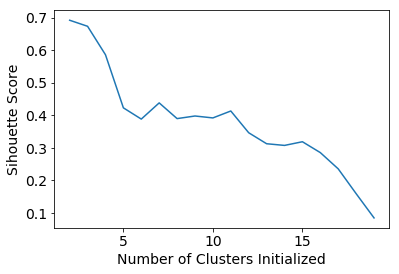

In [11]:
# 6）Scaled data 数据预处理得先标准化一波，一般来说
# 导入标准化的包
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
print("***********************************")

# 用KMeans的fit一下
km = KMeans(n_clusters=3).fit(X_scaled)
# pandas新建一列
beer["scaled_cluster"] = km.labels_
print(beer.sort_values("scaled_cluster"))
# 求质心均值
beer.groupby("scaled_cluster").mean()
# 画出标准化后的图像
#pd.scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

# 8）聚类评估：采用轮廓系数：
## 聚类评估：轮廓系数（Silhouette Coefficient ）

#<img src="1.png" alt="FAO" width="490">
#- 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
#- 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}
#* si接近1，则说明样本i聚类合理
#* si接近-1，则说明样本i更应该分类到另外的簇
#* 若si 近似为0，则说明样本i在两个簇的边界上。

from sklearn import metrics
#做了标准化后的结果
score_scaled = metrics.silhouette_score(X, beer.scaled_cluster)
#没做标准化的结果
score = metrics.silhouette_score(X, beer.cluster1)
print(score_scaled, score)
print("***********************************")


# 9)遍历K值，看哪个K值合适
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

print(scores)

plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
plt.show()


# DBSCAN clustering 算法后续补上